# Tutorial

A quick tutorial on how to use the implementation and a comparison with the implementation by [Ni et al.](https://github.com/saibalmars/GraphRicciCurvature/tree/master?tab=readme-ov-file)

## Preparation

Import the packages we use and our implementation.

In [21]:
# Colab setting
!pip install GraphRicciCurvature

from Ricci_curvature import lin_lu_yau_curvature, ollivier_ricci_curvature
from util import graph_reader
from GraphRicciCurvature.OllivierRicci import OllivierRicci
import networkx as nx
import time
import matplotlib.pyplot as plt
from time import process_time
from tqdm.auto import tqdm

## Ricci-Curvature

First, we compute the Lin-Lu-Yau curvature of a regular graph.

Lin-Lu-Yau curvature of the edge (3,13) is 0.7
Lin-Lu-Yau curvature of the edge (3,15) is 0.6
Lin-Lu-Yau curvature of the edge (3,17) is 0.6


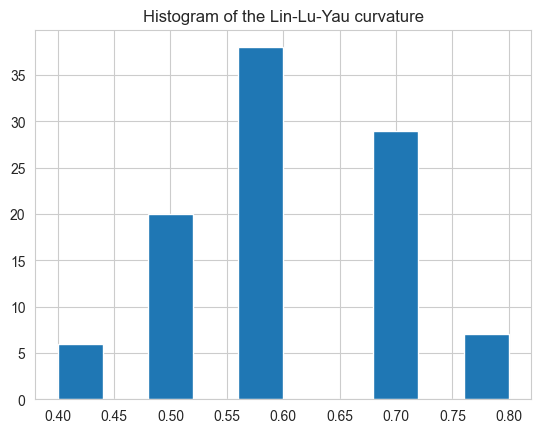

In [2]:
G = nx.random_regular_graph(10,20, seed=0)
lly_curvature = lin_lu_yau_curvature(G)
for x, y in list(G.edges)[:3]:
    print('Lin-Lu-Yau curvature of the edge ({0},{1}) is {2}'.format(x,y,lly_curvature[(x,y)]))

plt.hist(lly_curvature.values())
plt.title("Histogram of the Lin-Lu-Yau curvature")
plt.show()


Similarly, we compute the $0$-Ollivier-Ricci curvature of a regular graph.

0-Ollivier-Ricci curvature of the edge (0,5) is 0.8235294117647058
0-Ollivier-Ricci curvature of the edge (0,60) is 0.803921568627451
0-Ollivier-Ricci curvature of the edge (0,50) is 0.7647058823529411


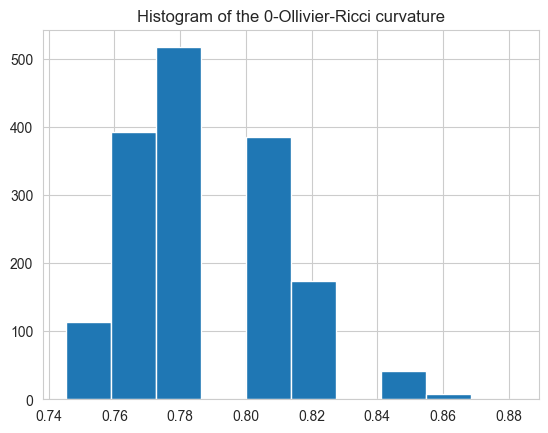

In [4]:
orc_curvature = ollivier_ricci_curvature(G)
for x, y in list(G.edges)[:3]:
    print('0-Ollivier-Ricci curvature of the edge ({0},{1}) is {2}'.format(x,y,orc_curvature[(x,y)]))

plt.hist(orc_curvature.values())
plt.title("Histogram of the 0-Ollivier-Ricci curvature")
plt.show()

## Graphs with positive Ricci curvature

Using our implementation, we determine the number of 4-regular graphs $G$ on 14 vertices with $Ric(G)>0$. This analysis utilizes a database containing the adjacency lists of all 4-regular graphs up to isomorphism, generated by [GENREG](http://www.mathe2.uni-bayreuth.de/markus/reggraphs.html).

In [ ]:
def positive_lly_curvature_graphs(graph_list):
    pos_curvature = []
    for G in graph_list:
        if all(v > 0 for v in lin_lu_yau_curvature(G).values()):
            pos_curvature.append(G)
    return pos_curvature

In [ ]:
regular_graphs_14_4 = graph_reader("./regular_graph_database/14_4.txt")
pos_lly_curvature = positive_lly_curvature_graphs(regular_graphs_14_4)
print("There are {} 4-regular graphs on 14 vertices with positive Lin-Lu-Yau curvature".format(len(pos_lly_curvature)))

There are 9 4-regular graphs on 14 vertices with positive Lin-Lu-Yau curvature


We can do the same analysis for the 0-Ollivier-Ricci curvature

In [15]:
def positive_or_curvature_graphs(graph_list):
    pos_curvature = []
    for G in graph_list:
        if all(v > 0 for v in ollivier_ricci_curvature(G).values()):
            pos_curvature.append(G)
    return pos_curvature

In [16]:
pos_or_curvature = positive_or_curvature_graphs(regular_graphs_14_4)
print("There are {} 4-regular graphs on 14 vertices with positive Ollivier-Ricci curvature".format(len(pos_or_curvature)))

There are 0 4-regular graphs on 14 vertices with positive Ollivier-Ricci curvature


# Comparison with other implementations

To evaluate the efficiency of our implementation for calculating Lin-Lu-Yau curvature of regular graphs, we compare it with the implementation by [Ni et al.](https://github.com/saibalmars/GraphRicciCurvature/tree/master?tab=readme-ov-file)

In [22]:
# Function to evaluate the average CPU times of the different implementations

def calculate_average_cpu_times(n, degree_sequence, iterations):
    lst_my = []
    lst_Ni = []

    for d in tqdm(degree_sequence):
        avg_time_mp = 0
        avg_time_Ni = 0
        
        for _ in range(iterations):

            G = nx.random_regular_graph(d,n)
            A = [[0 for _ in range(len([v for v in G.nodes()]))] for _ in range(len([v for v in G.nodes()]))]
            for i in range(len([v for v in G.nodes()])):
                for j in range(len([v for v in G.nodes()])):
                    if G.has_edge(i,j):
                        A[i][j] = 1

            t1_start = process_time()
            lin_lu_yau_curvature(G)
            t1_stop = process_time()
            avg_time_mp += t1_stop - t1_start

            t2_start = process_time()
            orc = OllivierRicci(G, alpha=0.5, method="OTD",verbose="ERROR")
            orc.compute_ricci_curvature()
            # G_orc = orc.G.copy()
            t2_stop = process_time()
            avg_time_Ni += t2_stop - t2_start


        lst_Ni.append(avg_time_Ni/iterations)
        lst_my.append(avg_time_mp/iterations)
    
    return lst_my, lst_Ni

[0.0008012699999986239, 0.0010455799999996883, 0.0013638499999990472, 0.0015561100000007855, 0.001802919999998096, 0.0017732699999984903, 0.0016703099999989491, 0.0013932899999997517]
[0.030341810000001034, 0.030115270000000294, 0.030779760000001204, 0.0313701199999997, 0.0331896999999995, 0.03363537000000008, 0.03534575000000047, 0.03294618999999955]


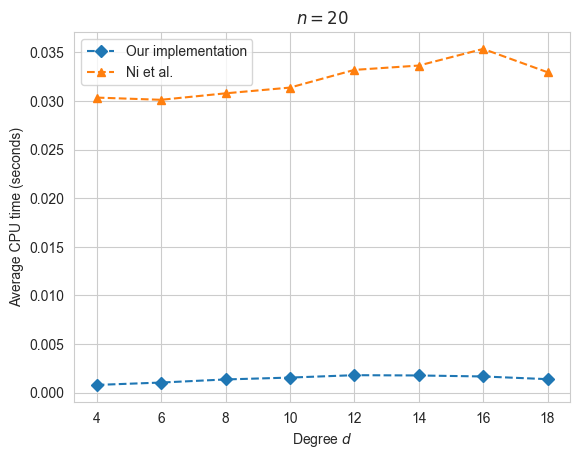

In [20]:
degree_sequence = [4,6,8,10,12,14,16,18]
my, Ni = calculate_average_cpu_times(20, degree_sequence=degree_sequence, iterations=100)
print(my)
print(Ni)

plt.plot(degree_sequence, my, linestyle='--', marker='D', label='Our implementation')
plt.plot(degree_sequence, Ni, linestyle='--', marker='^', label='Ni et al.')


plt.xlabel('Degree $d$')
plt.ylabel('Average CPU time (seconds)')
plt.title("$n=20$")
plt.legend()
plt.show()

Our implementation is up to 40 times faster on small, regular graphs. The difference in performance makes it infeasible to classify all regular graphs $G$ with $Ric(G)>0$ on, e.g., 14 vertices using the implementation by [Ni et al.](https://github.com/saibalmars/GraphRicciCurvature/tree/master?tab=readme-ov-file)